# Name: Thomas Buchegger

In [1]:
%matplotlib inline
import torch
import torchvision
from torchvision.transforms import Compose, ToTensor, Normalize

import matplotlib.pyplot as plt
import numpy as np

from tqdm.notebook import tqdm
from IPython.display import clear_output

# Define which device to use for computations
# If you have gpu, use 'cuda'
# device = torch.device('cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks')

# Assignment 1 ATML 2021

## Task 1. Prepare data for training and model selection

PyTorch torchvision module provides you with some predesigned datasets. Like the MNIST dataset, that we are going to use (https://pytorch.org/vision/0.8/_modules/torchvision/datasets/mnist.html#MNIST). Let us build a simple MNIST dataset and visualise some samples.

In [4]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz

--2021-03-28 13:42:09--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-03-28 13:42:09--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz.1’

MNIST.tar.gz.1          [           <=>      ]  33.20M  6.48MB/s    in 5.6s    

2021-03-28 13:42:16 (5.90 MB/s) - ‘MNIST.tar.gz.1’ saved [34813078]



In [5]:
!tar -zxvf MNIST.tar.gz

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/train-images-idx3-ubyte.gz
MNIST/processed/
MNIST/processed/training.pt
MNIST/processed/test.pt


In [6]:
from torchvision.datasets import MNIST
# Create MNIST dataset
root_dir = './'
torchvision.datasets.MNIST(root=root_dir,train=True,download=True)


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train

In [7]:
dataset = torchvision.datasets.MNIST(root=root_dir, train=True, download=True)


In [8]:
print(len(dataset))

60000


5


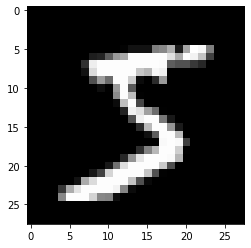

In [9]:
# Show elements of dataset
image, label = dataset[0]
plt.figure()
plt.imshow(image, cmap='gray')
print(label)

For the needs of this assignment you will have to implement a similar Dataset class which will yield an image pair and a label equal to the mode 10 sum of the labels in the pair. 

### MnistPairs dataset

Implement the __getitem__ method in the dataset.py file. Build training and test sets with the 'right' and 'left' orders of the digits. Split the both training sets into training and validation sets with 90% and 10% of the data respectively. Concatenate the validation sets into one with both 'right' and 'test' orders. The same should be done with the test sets. Visualise some samples from the constructed datasets.

In [10]:
from tati import MnistPairs

In [11]:

transforms = Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))])
# unstransformed datasets for display
dsLeft = MnistPairs(root_dir, train=True, download=True, order='left')
dsLeftOrig = MnistPairs(root_dir, train=True, download=True, order='left', return_original_labels=True)
dsLeftConcat = MnistPairs(root_dir, train=True, download=True, transform=transforms, order='left', concat=True)
dsLeftConcatOrig = MnistPairs(root_dir, train=True, download=True, transform=transforms, order='left', return_original_labels=True, concat=True)

dsRight = MnistPairs(root_dir, train=True, download=True)
dsRightOrig = MnistPairs(root_dir, train=True, download=True, return_original_labels=True)
dsRightConcat = MnistPairs(root_dir, train=True, download=True, transform=transforms, concat=True)
dsRightConcatOrig = MnistPairs(root_dir, train=True, download=True, transform=transforms, return_original_labels=True, concat=True)

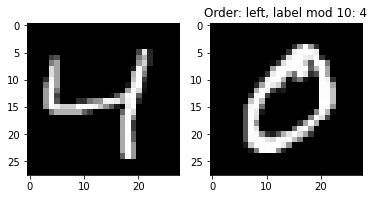

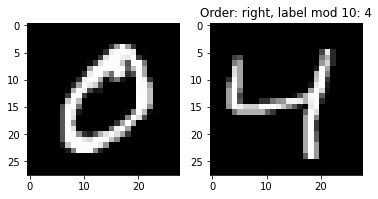

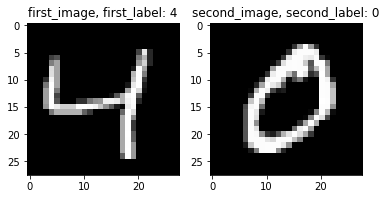

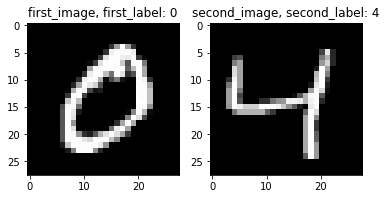

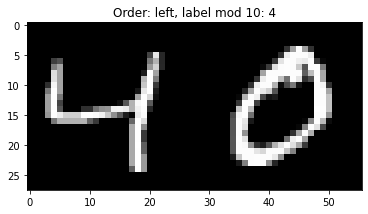

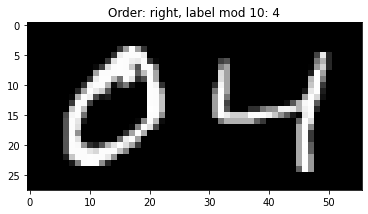

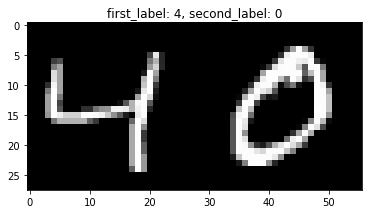

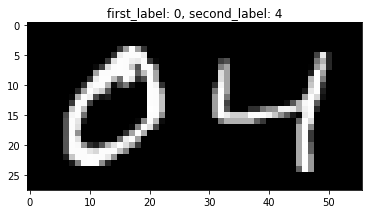

In [12]:
dsLeftEntry = dsLeft[1]
plt.subplot(1,2,1), plt.imshow(dsLeftEntry[0], cmap='gray')
plt.subplot(1,2,2), plt.imshow(dsLeftEntry[1], cmap='gray')
plt.title("Order: left, label mod 10: {}".format(dsLeftEntry[2]))
plt.show()

dsRightEntry = dsRight[1]
plt.subplot(1,2,1), plt.imshow(dsRightEntry[0], cmap='gray')
plt.subplot(1,2,2), plt.imshow(dsRightEntry[1], cmap='gray')
plt.title("Order: right, label mod 10: {}".format(dsRightEntry[2]))
plt.show()

dsLeftOrigEntry = dsLeftOrig[1]
plt.subplot(1,2,1), plt.imshow(dsLeftOrigEntry[0], cmap='gray')
plt.title("first_image, first_label: {}".format(dsLeftOrigEntry[3]))
plt.subplot(1,2,2), plt.imshow(dsLeftOrigEntry[1], cmap='gray')
plt.title("second_image, second_label: {}".format(dsLeftOrigEntry[4]))
plt.show()

dsRightOrigEntry = dsRightOrig[1]
plt.subplot(1,2,1), plt.imshow(dsRightOrigEntry[0], cmap='gray')
plt.title("first_image, first_label: {}".format(dsRightOrigEntry[3]))
plt.subplot(1,2,2), plt.imshow(dsRightOrigEntry[1], cmap='gray')
plt.title("second_image, second_label: {}".format(dsRightOrigEntry[4]))
plt.show()

dsLeftConcatEntry = dsLeftConcat[1]
plt.imshow(np.squeeze(dsLeftConcatEntry[0]), cmap='gray')
plt.title("Order: left, label mod 10: {}".format(dsLeftConcatEntry[1]))
plt.show()

dsRightConcatEntry = dsRightConcat[1]
plt.imshow(np.squeeze(dsRightConcatEntry[0]), cmap='gray')
plt.title("Order: right, label mod 10: {}".format(dsRightConcatEntry[1]))
plt.show()

dsLeftConcatOrigEntry = dsLeftConcatOrig[1]
plt.imshow(np.squeeze(dsLeftConcatOrigEntry[0]), cmap='gray')
plt.title("first_label: {}, second_label: {}".format(dsLeftConcatOrigEntry[2], dsLeftConcatOrigEntry[3]))
plt.show()

dsRightConcatOrigEntry = dsRightConcatOrig[1]
plt.imshow(np.squeeze(dsRightConcatOrigEntry[0]), cmap='gray')
plt.title("first_label: {}, second_label: {}".format(dsRightConcatOrigEntry[2], dsRightConcatOrigEntry[3]))
plt.show()


In [13]:
# # transformed datasets
# transforms = Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))])

# dsLeftConcatOrig = MnistPairs(root_dir, train=True, download=True, order='left', return_original_labels=True, concat=True)
# dsRightConcatOrig = MnistPairs(root_dir, train=True, download=True, return_original_labels=True, concat=True)

# dsLeftTest = MnistPairs(root_dir, train=False, download=True, order='left', return_original_labels=True, concat=True)
# dsRightTest = MnistPairs(root_dir, train=False, download=True, return_original_labels=True, concat=True)

In [14]:
from torch.utils import data

In [15]:
dsLeftTest = MnistPairs(root_dir, train=False, download=True, transform=transforms, order='left', return_original_labels=True, concat=True)
dsRightTest = MnistPairs(root_dir, train=False, download=True, transform=transforms, return_original_labels=True, concat=True)

lTrainLen = int(0.9 * len(dsLeftConcatOrig))
rTrainLen = int(0.9 * len(dsRightConcatOrig))
lValLen = len(dsLeftConcatOrig) - lTrainLen
rValLen = len(dsRightConcatOrig) - rTrainLen

dsLeftTrain, dsLeftVal = data.random_split(dsLeftConcatOrig, [lTrainLen, lValLen])
dsRightTrain, dsRightVal = data.random_split(dsRightConcatOrig, [rTrainLen, rValLen])

datasetsVal = [dsLeftVal, dsRightVal]
datasetsTrain = [dsLeftTrain, dsRightTrain]
datasetsTest = [dsLeftTest, dsRightTest]

concatVal = data.ConcatDataset(datasetsVal)
concatTrain = data.ConcatDataset(datasetsTrain)
concatTest = data.ConcatDataset(datasetsTest)

### Label and Pair Distribution

Visualize the distribution of the labels and pairs in the training, validation and testing sets.

Distribution of the concatenated training set:


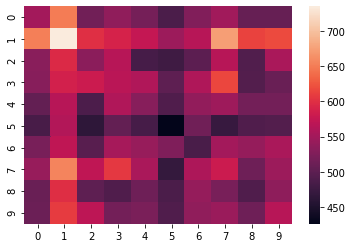


Distribution of the concatenated validation set:


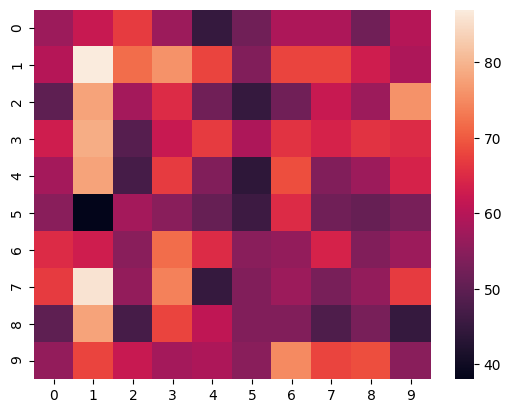


Distribution of the concatenated test set:


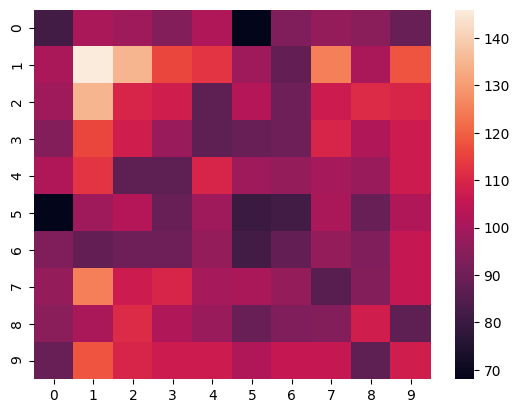

In [16]:
import seaborn as sns;

def calculate_distribution_of_labels(dataset):
    pairs = np.zeros((10,10))
    for entry in dataset:
        pairs[entry[2], entry[3]] += 1
    
    sns.heatmap(pairs)
    plt.show()
    plt.rcdefaults()

print("Distribution of the concatenated training set:")
calculate_distribution_of_labels(concatTrain)
print("")

print("Distribution of the concatenated validation set:")
calculate_distribution_of_labels(concatVal)
print("")

print("Distribution of the concatenated test set:")
calculate_distribution_of_labels(concatTest)

If the distribution of the labels in the test set differs from the one in the training set, we should expect a different performance of the model on the test set.

## Task 2. Design training settings

Having the MnistPairs dataset implemented, we can now nicely wrap in with a DataLoader class for the ease of training.

In [17]:
import torch.nn as nn
from torch.utils.data import DataLoader  

In [18]:
trainLeft_loader = DataLoader(dsLeftTrain, batch_size=128, shuffle=True)
valLeft_loader = DataLoader(dsLeftVal, batch_size=128, shuffle=False)
testLeft_loader = DataLoader(dsLeftTest, batch_size=128, shuffle=False)

trainRight_loader = DataLoader(dsRightTrain, batch_size=128, shuffle=True)
valRight_loader = DataLoader(dsRightVal, batch_size=128, shuffle=False)
testRight_loader = DataLoader(dsRightTest, batch_size=128, shuffle=False)

train_loader = DataLoader(concatTrain, batch_size=128, shuffle=True)
val_loader = DataLoader(concatVal, batch_size=128, shuffle=False)
test_loader = DataLoader(concatTest, batch_size=128, shuffle=False)

Define a bunch of models to test, the loss function and the optimizers.

In [19]:
# Hyperparameters
input_size = 56*28
hidden_sizes = [128, 64]
output_size = 10
loss_fn = nn.CrossEntropyLoss()

In [20]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.main = nn.Sequential(nn.Sigmoid(),
                                  nn.Linear(56*28, 256),
                                  nn.ReLU(),
                                  nn.Linear(256, 128),
                                  nn.Sigmoid(),
                                  nn.Linear(128, 10),
                                  nn.LogSoftmax(dim=1))

    def forward(self, x):
        out = x.view(x.size(0), 56*28)
        out = self.main(out)
        return out

In [21]:
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.main = nn.Sequential(nn.ReLU(),
                                  nn.Linear(56*28, 256),
                                  nn.ReLU(),
                                  nn.Linear(256, 128),
                                  nn.ReLU(),
                                  nn.Linear(128, 10),
                                  nn.LogSoftmax(dim=1))

    def forward(self, x):
        out = x.view(x.size(0), 56*28)
        out = self.main(out)
        return out

In [22]:
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.main = nn.Sequential(nn.Sigmoid(),
                                  nn.Linear(56*28, 256),
                                  nn.Sigmoid(),
                                  nn.Linear(256, 128),
                                  nn.Sigmoid(),
                                  nn.Linear(128, 10),
                                  nn.LogSoftmax(dim=1))

    def forward(self, x):
        out = x.view(x.size(0), 56*28)
        out = self.main(out)
        return out

Let us also define the metric we are going to use for the assesment of the model. We will simply use the accuracy of the model.

In [23]:
def accuracy(labels, predictions):
    # Return the accuracy of predictions, i.e. the part of cases
    # where the corresponding prediction matches the label.

    _, preds = torch.max(predictions, dim=1)
    acc = 100 * torch.tensor(torch.sum(preds == labels).item() / len(preds))
    return acc

Write the training loop.

In [36]:
def train_epoch(model, dataloader, optimizer, loss_fn):
    trainLosses = []
    correct_predictions = 0

    for iteration, (images, labels, _, _) in enumerate(tqdm(dataloader)):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = loss_fn(output, labels)
        loss.backward()
        optimizer.step()
        # Log metrics
        trainLosses.append(loss.item())
        predicted_labels = output.argmax(dim=1)
        correct_predictions += (predicted_labels == labels).sum().item()
    accuracy = 100.0 * correct_predictions / len(dataloader.dataset)
    # Return loss values for each iteration and accuracy
    mean_loss = np.array(trainLosses).mean()
    return mean_loss, accuracy

Write the evaluation code.

In [40]:
def evaluate_model(model, dataset_loader, loss_fn):
    losses = []
    correct_predictions = 0
    with torch.no_grad():
        for images, labels, _, _ in dataset_loader:
            images = images.to(device)
            labels = labels.to(device)
            output = model(images)
            loss = loss_fn(output, labels)
            predicted_labels = output.argmax(dim=1)
            correct_predictions += (predicted_labels == labels).sum().item()
            losses.append(loss.item())
    mean_loss = np.array(losses).mean()
    accuracy = 100.0 * correct_predictions / len(dataset_loader.dataset)
    # Return mean loss and accuracy
    return mean_loss, accuracy

## Task 3. Train on training 'right' set.

Train the models on training 'right' set and select the best model on the validation set.

In [45]:
def train(model, train_dataloader, val_dataloader, optimizer, n_epochs, loss_function):
    # We will monitor loss functions as the training progresses
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(n_epochs):
        model.train()
        train_loss, train_accuracy = train_epoch(model, train_dataloader, optimizer, loss_fn)
        model.eval()
        val_loss, val_accuracy = evaluate_model(model, val_dataloader, loss_fn)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        print('Epoch {}/{}: train_loss: {:.4f}, train_accuracy: {:.4f}, val_loss: {:.4f}, val_accuracy: {:.4f}'.format(epoch+1, n_epochs,
                                                                                                      train_losses[-1],
                                                                                                      train_accuracies[-1],
                                                                                                      val_losses[-1],
                                                                                                      val_accuracies[-1]))
    return train_losses, val_losses, train_accuracies, val_accuracies

In [46]:
def plot(n_epochs, train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure()
    plt.plot(np.arange(n_epochs), train_losses)
    plt.plot(np.arange(n_epochs), val_losses)
    plt.legend(['train_loss', 'val_loss'])
    plt.xlabel('epoch')
    plt.ylabel('loss value')
    plt.title('Train/val loss');

    plt.figure()
    plt.plot(np.arange(n_epochs), train_accuracies)
    plt.plot(np.arange(n_epochs), val_accuracies)
    plt.legend(['train_acc', 'val_acc'])
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Train/val accuracy');

In [ ]:
# Initialize loss function, optimizer and parameters
model = Model1()
model = model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 20

train_losses, val_losses, train_acc, val_acc = train(model, trainRight_loader, valRight_loader, optimizer, n_epochs, loss_fn)

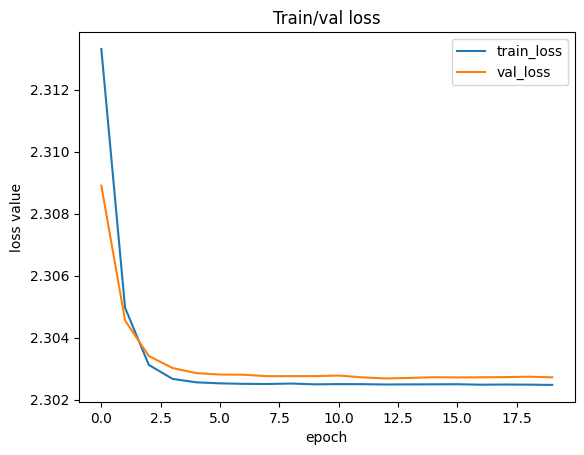

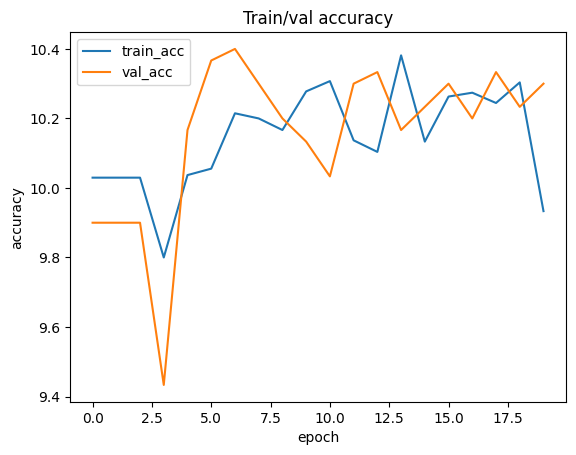

In [48]:
plot(n_epochs, train_losses, val_losses, train_acc, val_acc)

In [ ]:
model = Model2()
model = model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 20

train_losses, val_losses, train_acc, val_acc = train(model, trainRight_loader, valRight_loader, optimizer, n_epochs, loss_fn)

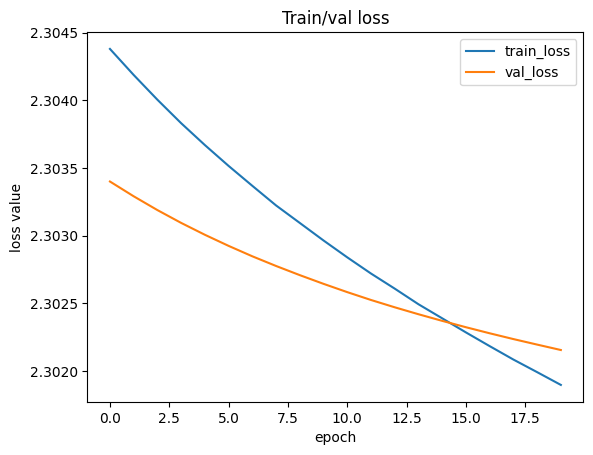

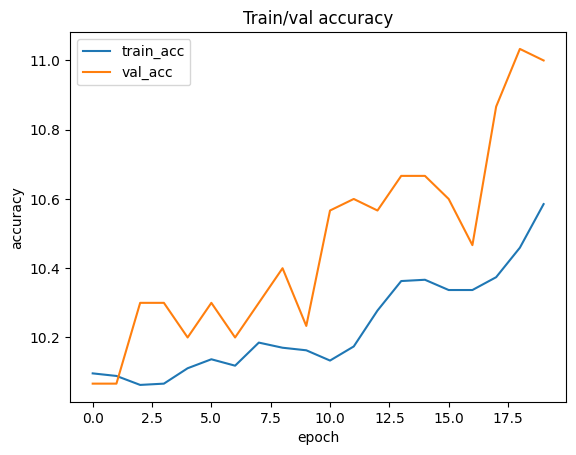

In [50]:
plot(n_epochs, train_losses, val_losses, train_acc, val_acc)

In [ ]:
model = Model3()
model = model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 20

train_losses, val_losses, train_acc, val_acc = train(model, trainRight_loader, valRight_loader, optimizer, n_epochs, loss_fn)

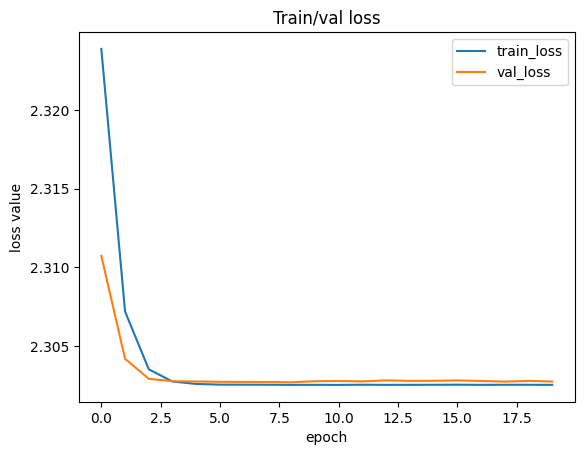

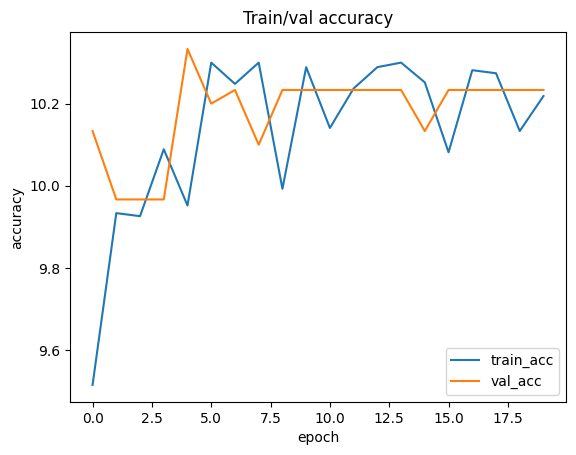

In [52]:
plot(n_epochs, train_losses, val_losses, train_acc, val_acc)

## Task 4. Train on concatenated training set.

Train the models on concatenated training set and select the best model on the validation set.

In [ ]:
# Initialize loss function, optimizer and parameters
model = Model1()
model = model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 20

train_losses, val_losses, train_acc, val_acc = train(model, train_loader, val_loader, optimizer, n_epochs, loss_fn)

In [ ]:
plot(n_epochs, train_losses, val_losses, train_acc, val_acc)

In [ ]:
model = Model2()
model = model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 20

train_losses, val_losses, train_acc, val_acc = train(model, train_loader, val_loader, optimizer, n_epochs, loss_fn)

In [ ]:
plot(n_epochs, train_losses, val_losses, train_acc, val_acc)

In [ ]:
model = Model3()
model = model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 20

train_losses, val_losses, train_acc, val_acc = train(model, train_loader, val_loader, optimizer, n_epochs, loss_fn)

In [ ]:
plot(n_epochs, train_losses, val_losses, train_acc, val_acc)

##  Task 5. Evaluation

From the previously selected models select the one that shows the best results on the validation set. Let's denote this as the best model. How can you explain the differences in the accuracies of the models trained on different training sets?


Dunno yet, we'll see!

Report the accuracy of the best model on the test set.

## Task 6. Visualizations

Visualize some examples of the best model's successful and failure predictions on the test set. Visualize the accuaracy depending on the digit pairs. Why is the model better or worse on some digits? 